Test out the new astrometry metrics

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
from mafContrib import ParallaxCoverageMetric, ParallaxHADegenMetric

In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('enigma_1189_sqlite.db')
outDir = 'astrometry2'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []
sqls = ['night < 100', 'night < 1200']
slicer = slicers.HealpixSlicer(nside=16)
for sql in sqls:
    metric = ParallaxCoverageMetric()
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict={'colorMin':0,'colorMax':1}))
    metric = ParallaxHADegenMetric()
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict={'colorMin':-1,'colorMax':1}))

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes


Querying database with constraint night < 1200
Found 818915 visits
Running:  ['opsim_ParallaxCoverageMetric_night_lt_1200_HEAL', 'opsim_ParallaxHADegenMetric_night_lt_1200_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint night < 100
Found 76940 visits
Running:  ['opsim_ParallaxHADegenMetric_night_lt_100_HEAL', 'opsim_ParallaxCoverageMetric_night_lt_100_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night < 1200 sqlconstraint now.
monopole: 0.439978  dipole: lon: -167.864, lat: -19.9552, amp: 0.0487939
monopole: 0.0411865  dipole: lon: 73.4788, lat: 40.4061, amp: 0.241449
Plotting complete.
Plotting figures with night < 100 sqlconstraint now.
monopole: 0.233386  dipole: lon: 19.4139, lat: 32.1231, amp: 0.472214
monopole: 0.0551516  dipole: lon: 139.526, lat: 9.57271, amp: 0.198294
Plotting complete.


/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/scipy/stats/stats.py:2749: RuntimeWarning: invalid value encountered in true_divide
  t = rs * np.sqrt((n-2) / ((rs+1.0)*(1.0-rs)))
/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1728: RuntimeWarning: invalid value encountered in greater
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1728: RuntimeWarning: invalid value encountered in less
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1729: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


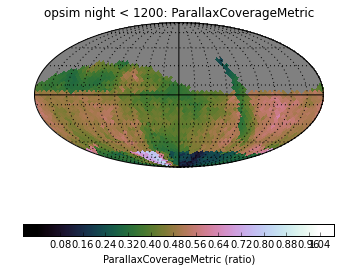

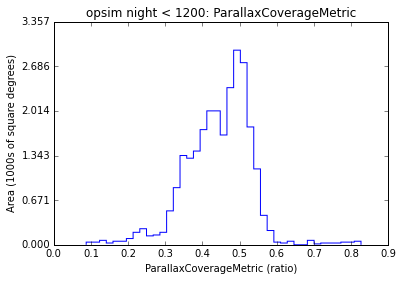

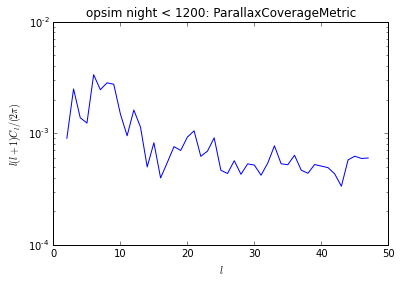

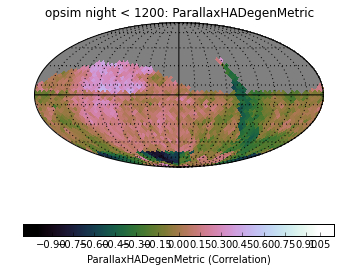

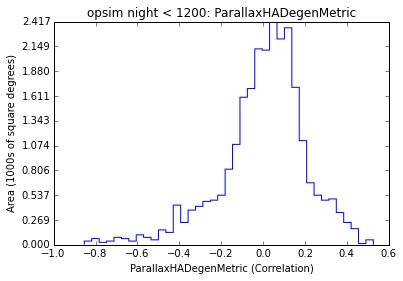

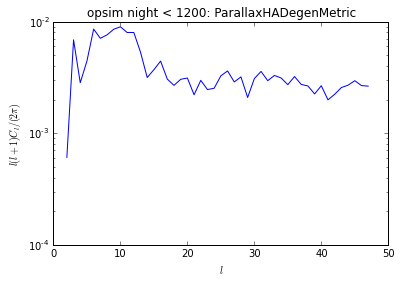

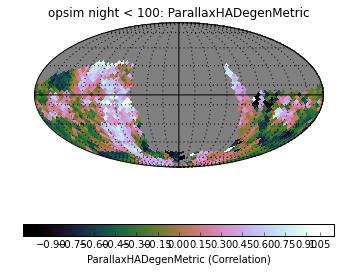

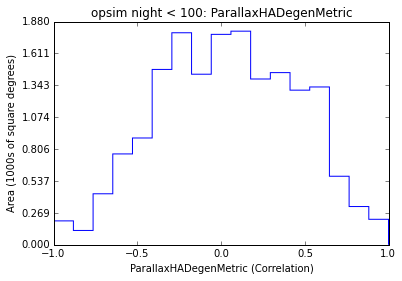

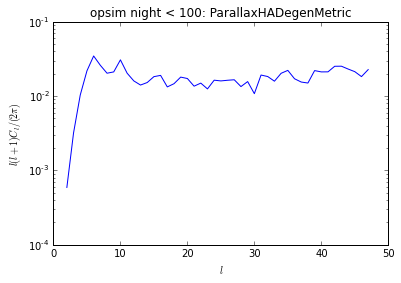

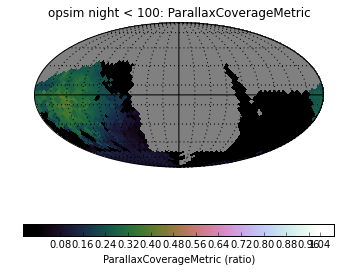

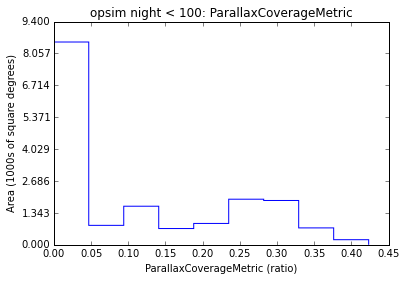

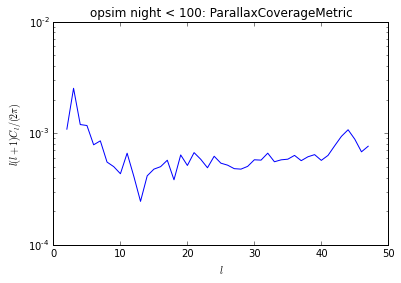

In [4]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)